<a href="https://colab.research.google.com/github/dudaribeiro7/intro_modelagem_computacional_UFJF/blob/main/%5BMAC024%5D_T1_2022_1_grupo_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---


# Identificação da Equipe

  Equipe C1

1. Camila Ribeiro Passos
2. Felipe da Costa Pinto Vilela
3. Maria Eduarda Ribeiro Facio

---
---


# Condições Gerais



Primeiro trabalho de Introdução a Modelagem Computacional


As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com até e 4 integrantes. 

2. A avaliação será realizada por meio da entrega de um relatório com a contextualização da solução, explicação do desenvolvimento e os códigos desenvolvidos até a data estipulada.
 - O notebook do enunciado deverá ser usado para entrega do relatório
 - Cada questão deve conter a proposta de solução, com a explicação da metodologia empregada na solução
 

3. Os documentos necessários para a entrega do trabalho são (1) um relatório com a explicação das soluções e (2) os códigos desenvolvidos pela equipe. 
A equipe deve usar este modelo de notebook para desenvolver os códigos. Os pontos (1) e (2) podem ser entregues no notebook de enunciado.

4. Um dos integrantes será indentificado como responsável pela entrega do documentos necessários.

5. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.

6. As equipes devem ser formadas até às **18 horas o dia 07/06/2022** por meio do preenchimento da planilha [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit?usp=sharing).

7. A formação das equipes pode ser acompanhada arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit?usp=sharing). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A1, B1, C1, e assim por diante). O arquivo está aberto para edição e pode ser alterado até a data estipulada.

8. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

9. A equipe depe indicar no arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit?usp=sharing) um responsável pela entrega do projeto.   Qualquer outro integrante da equipe não poderá entregar o trabalho exceto em casos de força maior.

10. A entrega dos projetos (relatórios e códigos) deve ocorrer até às **23:59 do dia 14/06/2022** na plataforma da disciplina pelo responsável pela entrega.

11. Entregas realizadas após a data estipulada terão a nota da avaliação multiplicada por um coeficiente de **0.80**, cumulativo com os coeficientes de outros atrasos caso ocorram.

12. Quaiquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



---


---


# T1Q1 - Dinâmica de difusão  (10 pontos)

Considere a dinâmica de difusão de opinião entre cinco pessoas sentadas em uma estrutura em forma de anel. Cada indivíduo está conectado aos seus dois mais próximos vizinhos (ou seja, esquerda e direita). Inicialmente eles têm opiniões aleatórias (representadas como números reais aleatórios), mas a cada passo de tempo, cada indivíduo muda sua opinião à média local em sua vizinhança social (ou seja, sua própria opinião mais as de seus dois vizinhos, dividido por 3). Escreva essa dinâmica como uma equação de diferença linear com cinco variáveis, então estude seu comportamento assintótico calculando seus autovalores e autovetores.



## Contextualização

A imagem abaixo representa a dinâmica de difusão apresentada acima:

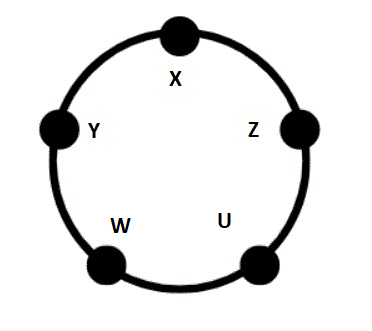

A partir da análise dessa dinâmica, tem-se as equações de diferenças:

$
\begin{matrix}
x_{t+1} &=& (x_t + y_t + z_t)/3\\
z_{t+1} &=& (z_t + x_t + u_t)/3\\
u_{t+1} &=& (u_t + w_t + z_t)/3\\
w_{t+1} &=& (w_t + y_t + u_t)/3\\
y_{t+1} &=& (y_t + x_t + w_t)/3\\
\end{matrix}
$



## Proposta de solução

In [ ]:
#Importando os pacotes:
import numpy as np
import matplotlib.pyplot as pl
import random
import sympy as sp

In [ ]:
#Montando a matriz para o cálculo dos autovalores:
sp.init_printing()

x,z,u,w,y = sp.var('x z u w y')
s = sp.Matrix([x, z, u, w, y])

F = sp.Matrix([
                [(+ s[0] + s[1] + s[4] )/3],
                [(+ s[1] + s[0] + s[2] )/3],
                [(+ s[2] + s[1] + s[3] )/3],
                [(+ s[3] + s[2] + s[4] )/3],
                [(+ s[4] + s[3] + s[0] )/3],
              ])

s, F

⎛     ⎡x   y   z⎤⎞
⎜     ⎢─ + ─ + ─⎥⎟
⎜     ⎢3   3   3⎥⎟
⎜     ⎢         ⎥⎟
⎜     ⎢u   x   z⎥⎟
⎜⎡x⎤  ⎢─ + ─ + ─⎥⎟
⎜⎢ ⎥  ⎢3   3   3⎥⎟
⎜⎢z⎥  ⎢         ⎥⎟
⎜⎢ ⎥  ⎢u   w   z⎥⎟
⎜⎢u⎥, ⎢─ + ─ + ─⎥⎟
⎜⎢ ⎥  ⎢3   3   3⎥⎟
⎜⎢w⎥  ⎢         ⎥⎟
⎜⎢ ⎥  ⎢u   w   y⎥⎟
⎜⎣y⎦  ⎢─ + ─ + ─⎥⎟
⎜     ⎢3   3   3⎥⎟
⎜     ⎢         ⎥⎟
⎜     ⎢w   x   y⎥⎟
⎜     ⎢─ + ─ + ─⎥⎟
⎝     ⎣3   3   3⎦⎠

Logo, tem-se:

$s_{n+1}=F(s_n)$

In [ ]:
#Função que define o sistema dinâmico:
def f(op_x, op_z, op_u, op_w, op_y):
  op[0] = op_x
  op[1] = op_z
  op[2] = op_u
  op[3] = op_w
  op[4] = op_y
  n = 5
  for i in range(0, n-1):
    if(i == 0):
      op[i] = (op[i] + op[n-1] + op[i+1])/3
    else:
      if(i == n-1):
        op[i] = (op[i] + op[i-1] + op[0])/3
      else:
        op[i] = (op[i] + op[i-1] + op[i+1])/3

  return op

#Evolução do sistema no tempo:
def evolve(f, op_x, op_z, op_u, op_w, op_y):
  t = 40

  opX = np.zeros(t)
  opX[0] = op_x

  opZ = np.zeros(t)
  opZ[0] = op_z

  opU = np.zeros(t)
  opU[0] = op_u

  opW = np.zeros(t)
  opW[0] = op_w

  opY = np.zeros(t)
  opY[0] = op_y

  for i in range(0, t-1):
    aux = f(opX[i], opZ[i], opU[i], opW[i], opY[i])
    opX[i+1] = aux[0]
    opZ[i+1] = aux[1]
    opU[i+1] = aux[2]
    opW[i+1] = aux[3]
    opY[i+1] = aux[4]

  return opX, opZ, opU, opW, opY

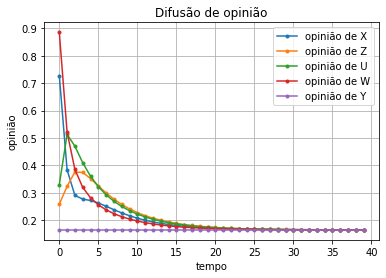

In [ ]:
#Vetor de opiniões iniciais:
op = np.random.rand(5)

#Montando o gráfico:
aux = evolve(f, op[0], op[1], op[2], op[3], op[4])
pl.plot(aux[0], '.-', label = 'opinião de X')
pl.plot(aux[1], '.-', label = 'opinião de Z')
pl.plot(aux[2], '.-', label = 'opinião de U')
pl.plot(aux[3], '.-', label = 'opinião de W')
pl.plot(aux[4], '.-', label = 'opinião de Y')
pl.legend()
pl.xlabel('tempo')
pl.ylabel('opinião')
pl.title("Difusão de opinião")
pl.grid()

Para encontrar os Pontos Fixos, basta resolver a seguinte equação

$F(s^*) = s^*$

$F(s^*) - s^* = 0$

In [ ]:
#Resolvendo a equação:
solucoes = sp.solve(F-s,*s,dict=True)

#Cálculo dos Pontos Fixos:
J = F.jacobian(s)
print('='*40+'\n'+'Pontos Fixos:'+'\n'+'='*40)
j=1
for k in solucoes:
    print('\n')
    print("Ponto", j, ":\n")
    display(k)
    aux = J.subs(k)
    V,D=aux.diagonalize()
    j=j+1
    #Cálculo dos autovalores:
    for l,i in enumerate(range(D.shape[0])):
        lamb=D[i,i]
        print('autovalor '+str(l+1)+': ')
        display(lamb)  

Pontos Fixos:


Ponto 1 :



autovalor 1: 


autovalor 2: 


autovalor 3: 


autovalor 4: 


autovalor 5: 


## Discussão da solução encontrada


Como todos os autovalores encontrados para o ponto de equilíbrio são, em módulo, menores do que 1, pode-se dizer que o modelo é estável ao redor do ponto de equilíbrio. Além disso, é possível perceber, através do gráfico, que, de acordo com essa dinâmica, as opiniões dos 5 integrantes do grupo, independente de quais sejam suas opiniões iniciais, tendem a ser as mesmas com o passar do tempo, o que faz sentido, já que o modelo é estável ao redor do ponto $(x=y, z=y, u=y, w=y, y)$.



---



# T1Q2 - Comportamento assintótico (10 pontos)


Estude o comportamento assintótico do seguinte modelo de equação de diferença tridimensional calculando seus autovalores e autovetores.

$
\begin{matrix}
x_{t+1} &=& +x_t-y_t\\
y_{t+1} &=& -x_t-3y_t+z_t\\
z_{t+1} &=& +y_t+z_t\\
\end{matrix}
$

In [ ]:
#Importação dos pacotes:
import pylab as pl
import sympy as sp
import pandas as pd

In [ ]:
#Montando a matriz para o cálculo:
sp.init_printing()

x,y,z = sp.var('x y z')
u = sp.Matrix([x, y, z])

F = sp.Matrix([
                [(+ u[0] -     u[1]       )],
                [(- u[0] - 3 * u[1] + u[2])],
                [(       +     u[1] + u[2])],
              ])

u, F

⎛⎡x⎤  ⎡   x - y    ⎤⎞
⎜⎢ ⎥  ⎢            ⎥⎟
⎜⎢y⎥, ⎢-x - 3⋅y + z⎥⎟
⎜⎢ ⎥  ⎢            ⎥⎟
⎝⎣z⎦  ⎣   y + z    ⎦⎠

Logo, tem-se:

$u_{n+1} = F(u_{n})$

In [ ]:
#Funções que definem o sistema dinâmico:
def f1(x, y):
  return x - y

def f2(x, y, z):
  return -x - 3*y + z

def f3(y, z):
  return y + z

#Evolução do sistema no tempo:
def evolve(f1, f2, f3, x_0, y_0, z_0):
  n=6

  x=np.zeros(n)
  x[0]=x_0

  y=np.zeros(n)
  y[0]=y_0

  z=np.zeros(n)
  z[0]=z_0

  for i in range(0,n-1):
    x[i+1] = f1(x[i], y[i])
    y[i+1] = f2(x[i], y[i], z[i])
    z[i+1] = f3(y[i], z[i])
  
  return x, y, z

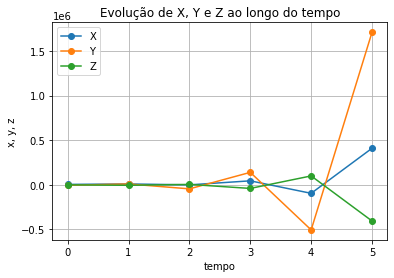

In [ ]:
#Montando o gráfico:

#Sugestão de valores para os valores iniciais x_0, y_0 e z_0:
x_0, y_0, z_0 = 5000, -5000, 10
aux = evolve(f1, f2, f3, x_0, y_0, z_0)
pl.plot(aux[0], 'o-', label='X')
pl.plot(aux[1], 'o-', label='Y')
pl.plot(aux[2], 'o-', label='Z')
pl.title("Evolução de X, Y e Z ao longo do tempo")
pl.xlabel('tempo')
pl.ylabel('x, y, z')
pl.legend()
pl.grid()

Para encontrar os Pontos Fixos, basta resolver a seguinte equação

$F(u^*) = u^*$

$F(u^*) - u^* = 0$

In [ ]:
#Resolvendo a equação:
solucoes = sp.solve(F-u,*u,dict=True)

#Cálculo dos Pontos Fixos:
J = F.jacobian(u)
print('='*40+'\n'+'Pontos Fixos:'+'\n'+'='*40)
j=1
for s in solucoes:
    print('\n')
    print("Ponto", j, ":\n")
    display(s)
    aux = J.subs(s)
    V,D=aux.diagonalize()
    j=j+1
    #Cálculo dos autovalores:
    for k,i in enumerate(range(D.shape[0])):
        lamb=D[i,i]
        print('autovalor '+str(k+1)+': ')
        display(lamb)  

Pontos Fixos:


Ponto 1 :



autovalor 1: 


autovalor 2: 


autovalor 3: 


Tendo sido encontrados 3 autovalores diferentes para um único ponto de equilíbrio, pode-se perceber que os autovalores 2 e 3 são, em módulo, maiores do que 1. Assim, conclui-se que tal modelo de equação de diferenças tem comportamento assintótico instável. 

# T1Q3 - Análise de estabilidade I (10 pontos)




Considere o seguinte sistema dinâmico, onde $a>0$ e $b>0$


$
\begin{matrix}
x_{t+1} &=& x_t + a\sin(bx_t)\\
\end{matrix}
$

Conduza uma análise de estabilidade linear para determinar se este modelo é estável ou não em seu ponto de equilíbrio $x^*=0$


 **Solução do problema:**

$x_{t+1} = f(x_{t}) = x_{t} + asin(bx_{t})$

$f'(x) = 1 + b/(sqrt(1-b^2x^2))$

--

Para o ponto de equilibrio $x^*=0$, $f'(0)=1+b$, portanto:

se $b>0$, há crescimento geométrico e o equílibrio é instável.

se $-1<b<0$, há decaimento geométrico e o equilibrio é estável.

se $-2<b<-1$, há decaimento geométrico e o equilibrio é estável.

se $b<-2$ há crescimento geométrico oscilante e o equilibrio é instavel.

--

Porém, como foi preestabelecido que $b>0$, então o equilíbrio é instável com crescimento geométrico.

In [ ]:
#Importando os pacotes:
import numpy as np
import pylab as pl
import math

In [ ]:
#Montando a matriz para o cálculo:
sp.init_printing()

x = sp.var('x')
a, b = sp.var('a b')
u = sp.Matrix([x])

a = sp.Matrix([a, b])
F = sp.Matrix([
                [u[0] + a[0] * sp.sin(a[1]*u[0])]
              ])

u, F

([x], [a⋅sin(b⋅x) + x])

Logo, tem-se:

$u_{n+1} = F(u_n)$

In [ ]:
#Função que define o sistema dinâmico:
def f(x, a, b):
  return x + a*math.sin(b*x)

#Evolução do sistema no tempo:
def evolve(f,a,b,x_0):
  n=100
  x=np.zeros(n)
  x[0]=x_0
  for i in range(0,n-1):
    x[i+1] = f(x[i],a,b)
  
  return x

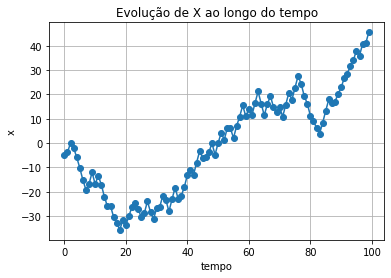

In [ ]:
#Montando o gráfico:

#Sugestão de valores para os parametros a, b e x_0:
a, b, x_0 = 5, 10, -5
aux = evolve(f, a, b, x_0)
pl.plot(aux, 'o-')
pl.title("Evolução de X ao longo do tempo")
pl.xlabel('tempo')
pl.ylabel('x')
pl.grid()

Para encontrar os pontos de equilíbrio, basta resolver a seguinte equação:

$F(u^*) = u^*$

$F(u^*) - u^* = 0$

In [ ]:
#Resolvendo a equação:
solucoes = sp.solve(F-u,*u,dict=True)

#Cálculo dos Pontos de Equilibrio:
print('='*40+'\n'+'Pontos de Equilíbrio:'+'\n'+'='*40)
j=1

#Sugestão de valores para os parametros a e b:
params={'a':5, 'b':10} 

#Calculando a matriz jacobiana:
J = F.jacobian(u)

for s in solucoes:
    print('\n')
    print("Ponto", j, ":\n")
    display(s)
    #Cálculo do jacobiano no ponto de equilíbrio:
    aux = J.subs(s).subs(params)
    V,D=aux.diagonalize()
    j=j+1
    #Cálculo dos autovalores:
    for k,i in enumerate(range(D.shape[0])):
        lamb=D[i,i]
        print('autovalor '+str(k+1)+': ')
        display(lamb) 

Pontos de Equilíbrio:


Ponto 1 :



autovalor 1: 




Ponto 2 :



autovalor 1: 


Como já verificado de forma iterativa anteriormente, o ponto de equilíbrio $x^*=0$ possui autovalor maior do que 1. Logo, o modelo é instável ao redor de $x^*=0$.

---


# T1Q4 - Análise de estabilidade II (10 pontos)

Considere o  seguinte sitemas discreto bidimensional


$
\begin{matrix}
x_{t+1} &=& +x_t+2x(1-x_t)-x_ty_t\\
y_{t+1} &=& +y_t+2y(1-y_t)-x_ty_t\\
\end{matrix}
$


1. Encontre todos os seus pontos de equilíbrio.
2. Calcule a matriz Jacobiana no ponto de equilíbrio onde $x > 0$ e $y > 0$.
3. Calcule os autovalores da matriz obtida acima.
4. Com base no resultado, classifique o ponto de equilíbrio.

In [ ]:
#Importando os pacotes:
import pylab as pl
import sympy as sp

In [ ]:
#Montando a matriz para o cálculo:
sp.init_printing()

x,y = sp.var('x y')
xt, yt = sp.var('x_t'), sp.var('y_t')
u = sp.Matrix([xt, yt])

a = sp.Matrix([x,y])
F = sp.Matrix([
                [+ u[0] + 2 * a[0] * (1 - u[0]) - u[0] * u[1]],
                [+ u[1] + 2 * a[1] * (1 - u[1]) - u[0] * u[1]],
              ])

u, F

⎛⎡xₜ⎤  ⎡2⋅x⋅(1 - xₜ) - xₜ⋅yₜ + xₜ ⎤⎞
⎜⎢  ⎥, ⎢                          ⎥⎟
⎝⎣yₜ⎦  ⎣-xₜ⋅yₜ + 2⋅y⋅(1 - yₜ) + yₜ⎦⎠

Logo, tem-se:

$u_{n+1} = F(u_n)$

In [ ]:
#Funções que definem o sistema dinâmico:
def f1(x, xt, yt):
  return 2*x*(1-xt) - xt*yt + xt

def f2(y, xt, yt):
  return 2*y*(1-yt) - xt*yt + yt

#Evolução do sistema no tempo:
def evolve(f1, f2, xt_0, yt_0, x, y):
  n=100

  xt=np.zeros(n)
  xt[0]=xt_0

  yt=np.zeros(n)
  yt[0]=yt_0

  for i in range(0,n-1):
    xt[i+1] = f1(x, xt[i], yt[i])
    yt[i+1] = f2(y, xt[i], yt[i])
  
  return xt, yt

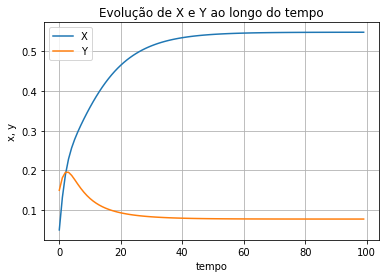

In [ ]:
#Montando o gráfico:

#Sugestão de valores para os valores iniciais x_0, y_0:
x_0, y_0 = 0.05, 0.15
#Sugestão de valores para os parametros x e y:
x, y = 0.047, 0.023
aux = evolve(f1, f2, x_0, y_0, x, y)
pl.plot(aux[0], '-', label='X')
pl.plot(aux[1], '-', label='Y')
pl.title("Evolução de X e Y ao longo do tempo")
pl.xlabel('tempo')
pl.ylabel('x, y')
pl.legend()
pl.grid()

Para encontrar os pontos de equilíbrio, basta resolver a seguinte equação:

$F(u^*) = u^*$

$F(u^*) - u^* = 0$

In [ ]:
#Calculando a matriz jacobiana:
J = F.jacobian(u)
J

⎡-2⋅x - yₜ + 1       -xₜ     ⎤
⎢                            ⎥
⎣     -yₜ       -xₜ - 2⋅y + 1⎦

Pontos de Equilíbrio:


Ponto 1 :



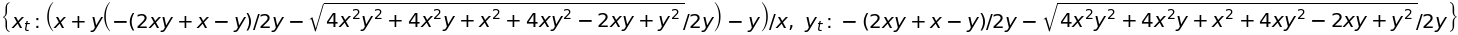


Jacobiano: Matrix([[2.12085382496487, 0.0838646377487677], [1.21485382496487, 1.03786463774877]]) 

autovalor 1: 


autovalor 2: 




Ponto 2 :



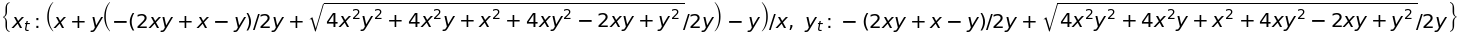


Jacobiano: Matrix([[0.828624435904692, -0.548502935621108], [-0.0773755640953081, 0.405497064378892]]) 

autovalor 1: 


autovalor 2: 


In [ ]:
#Resolvendo a equação:
solucoes = sp.solve(F-u,*u,dict=True)

#Cálculo dos Pontos de Equilibrio:
print('='*40+'\n'+'Pontos de Equilíbrio:'+'\n'+'='*40)
j=1

#Sugestão de valores para os parametros x e y:
params={'x':0.047, 'y':0.023} 

for s in solucoes:
    print('\n')
    print("Ponto", j, ":\n")
    display(s)
    #Cálculo do jacobiano no ponto de equilíbrio:
    aux = J.subs(s).subs(params)
    print("\nJacobiano:", aux, "\n")
    V,D=aux.diagonalize()
    j=j+1
    #Cálculo dos autovalores:
    for k,i in enumerate(range(D.shape[0])):
        lamb=D[i,i]
        print('autovalor '+str(k+1)+': ')
        display(lamb)  

Assumindo x = 0.047 e y = 0.023, foram encontrados 2 pontos de equilíbrio. 

O ponto 1 possui um autovalor maior do que 1, o que leva à conclusão de que ele é um ponto de equilíbrio instável.

Já o ponto 2 possui ambos os autovalores entre 0 e 1, logo, ele é um ponto de equilíbrio estável.

---


# T1Q5 Prescrição de antibiótico (20 pontos)

A ciprofloxacina é um antibiótico tomado para combater muitas infecções. Cipro é filtrado do sangue pelos rins. A cada período de 24 horas, os rins filtram cerca de um terço da ciprofloxacina que estava no sangue no início do período de 24 horas. 

1. Suponha que o paciente tenha recebido apenas uma dose única de 500 mg. Use a equação de diferença para construir uma tabela de valores listando a concentração no sangue desse paciente ao final de cada dia

2. Agora assume que o paciente deve tomar mais 500 mg por dia. Use a equação de diferença para construir uma tabela de valores listando a concentração no final de cada dia.

3. Compare e interprete as duas tabelas

In [ ]:
#Importando os pacotes:
import numpy as np
import pylab as pl

In [ ]:
#Parâmetros do modelo:
k = 1/3     #taxa de filtração do medicamento pelos rins
r = 1-k     #taxa de decaimento da concentração do medicamento no sangue
a0 = 500    #dose inicial
b = 500     #dose diária do medicamento
n=21        #número de dias

Para a situação 1, tem-se o seguinte modelo:

$a_{n+1} = r a_{n}$

onde $r$ é a taxa de decaimento da concentração do medicamento no sangue.

In [ ]:
a = np.zeros(n)
a[0]=a0

for i in range(0,n-1):
  a[i+1] = r * a[i]

#Construindo a tabela:
print("Dia\t Concentração no sangue")
print("-----------------------------------------")
for i in range(0, n):
  print(i, "\t", a[i])

Dia	 Concentração no sangue
-----------------------------------------
0 	 500.0
1 	 333.33333333333337
2 	 222.22222222222229
3 	 148.1481481481482
4 	 98.76543209876549
5 	 65.843621399177
6 	 43.89574759945133
7 	 29.26383173296756
8 	 19.50922115531171
9 	 13.006147436874475
10 	 8.670764957916317
11 	 5.780509971944212
12 	 3.853673314629475
13 	 2.569115543086317
14 	 1.7127436953908781
15 	 1.1418291302605856
16 	 0.7612194201737238
17 	 0.5074796134491493
18 	 0.3383197422994329
19 	 0.22554649486628864
20 	 0.1503643299108591


Para a situação 2, tem-se o modelo:

$a_{n+1} = r a_{n} + b$


onde $r$ é a taxa de decaimento da concentração do medicamento no sangue e $b$ é a dose diária do medicamento

In [ ]:
a = np.zeros(n)
a[0]=a0

for i in range(0,n-1):
  a[i+1] = r * a[i] + b

#Construindo a tabela:
print("Dia\t Concentração no sangue")
print("-----------------------------------------")
for i in range(0, n):
  print(i, "\t", a[i])

Dia	 Concentração no sangue
-----------------------------------------
0 	 500.0
1 	 833.3333333333334
2 	 1055.5555555555557
3 	 1203.703703703704
4 	 1302.4691358024693
5 	 1368.3127572016463
6 	 1412.2085048010977
7 	 1441.472336534065
8 	 1460.9815576893768
9 	 1473.9877051262513
10 	 1482.6584700841677
11 	 1488.4389800561119
12 	 1492.2926533707414
13 	 1494.8617689138277
14 	 1496.5745126092186
15 	 1497.716341739479
16 	 1498.4775611596529
17 	 1498.985040773102
18 	 1499.3233605154014
19 	 1499.5489070102676
20 	 1499.6992713401785


Comparando as duas situações:

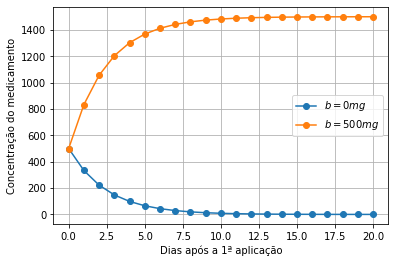

In [ ]:
def sistema_dinamico(n, a0, k, r, b):
  a = np.zeros(n)
  a[0]=a0
  for i in range(0,n-1):
    a[i+1] = r * a[i] + b
  return (a)

#Construindo o grafico:
aux = sistema_dinamico(n, a0, k, r, 0)
pl.plot(aux, 'o-',  label='$b = 0mg$')

aux = sistema_dinamico(n, a0, k, r, b)
pl.plot(aux, 'o-',  label='$b = '+str(b)+'mg$')

pl.xlabel('Dias após a 1ª aplicação')
pl.ylabel('Concentração do medicamento')
pl.legend()
pl.grid()

Para a primeira situação, a concentração do medicamento no sangue tende a 0mg de acordo com o passar dos dias. Já para a segunda situação, a concentração tende a 1500mg no sangue com o passar do tempo, se a pessoa continuar tomando o medicamento durante todo o tempo de análise.

---


# T1Q6 Difusão social (20 pontos)

Os sociólogos reconhecem um fenômeno chamado difusão social, que é a disseminação de uma informação, uma inovação tecnológica ou uma moda cultural entre uma população. Os membros da população podem ser divididos em duas classes: os que têm a informação e os que não têm. Em uma população fixa cujo tamanho é conhecido, é razoável supor que a taxa de difusão é proporcional ao número que tem a informação vezes o número que ainda não a recebeu. Se uma informação de $a_n$ indica o número de pessoas que têm a em uma população de $N$ pessoas após $n$ dias, formule um sistema dinâmico para aproximar a mudança no número de pessoas na população que tem a ~população.~ -> informação?

O problema acima é dado pelo modelo matemático:

$a_{n+1}  = a_{n} +  ka_{n} (N-a_{n})$

onde $k$ é um parâmetro que depende do quão rápido a informação se espalha.

In [ ]:
#Importação dos pacotes:
import pylab as pl
import numpy as np

In [ ]:
def sist_din(N, n, an_0, k):
  an = np.zeros(n)
  an[0] = an_0
  for i in range(0, n-1):
    #Cálculo do número de pessoas que não tem a informação:
    a = N - an[i] 
    #Cálculo da taxa de difusão:
    t_difusao = an[i] * a 
    #Atualiza o nº de pessoas com a informação:
    an[i+1] = an[i] + k*t_difusao
    if an[i+1] >= N:
      for j in range(i+1, n):
        an[j] = N
      return (an)

  return (an)

In [ ]:
#Parâmetros do modelo:
N = 1000        #tamanho da população fixa
n = 10          #número de dias
an_0 = 50       #número inicial de pessoas que tem a informação
list_k = [0.002, 0.004, 0.008, 0.016, 0.032]       #taxa de difusão

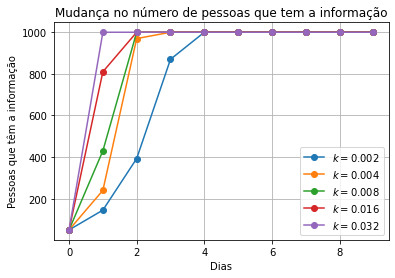

In [ ]:
#Montando o gráfico:
for k in list_k:
  aux = sist_din(N, n, an_0, k)
  pl.plot(aux, 'o-', label='$k = $'+str(k))
  pl.title('Mudança no número de pessoas que tem a informação')
  pl.xlabel('Dias')
  pl.ylabel('Pessoas que têm a informação')
  pl.legend()
  pl.grid()

A partir do gráfico pode-se perceber que, de acordo com esse modelo, quanto maior a taxa de difusão, ou seja, quanto maior o valor de k, mais rápido a informação será difundida.

---


# T1Q7 Competição entre baleias (20 pontos)

A baleia azul e a baleia-comum são duas espécies semelhantes que habitam as mesmas áreas. Por isso, eles supõe-se que há competição entre elas. A taxa de crescimento intrínseca de cada espécie é estimada em 5% ao ano para a baleia azul e 8% ao ano para a baleia-comum. A capacidade suporte do ambiente (o número máximo de baleias que o ambiente pode suportar) é estimada em 150.000 azuis e 400.000 baleia-comum. A extensão em que as baleias competem é desconhecida, e não foi ainda quantificada por pesquisadores. Nos últimos 100 anos, a caça intensa reduziu a população de baleias para cerca de 5.000 azuis e 70.000 barbatanas. Nessas condições, a baleia azul será extinta?

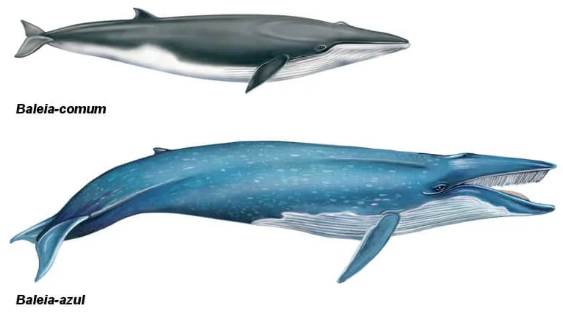

Um modelo de crescimento populacional com limite de população é descrito por:

$Δ$$p_{n+1} = kp_{n}(p_{lim} - p_{n})$

Sendo $k$ a taxa de crescimento populacional e $p_{lim}$ o número limite da população.

In [ ]:
#Importando os pacotes:
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
#Função de progressão com limite de crescimento:
def progressao(k_a, k_c, a_lim, c_lim, n, a_0, c_0, comp_a, comp_c):
  a = np.zeros(n)
  a[0] = a_0
  c = np.zeros(n)
  c[0] = c_0
  for i in range(0, n-1):
    a[i+1] = a[i] +  k_a*a[i]*(a_lim - a[i])
    a[i+1] = comp_a * a[i+1]
    if(a[i+1] < 0):
      a[i+1] = 0
    c[i+1] = c[i] +  k_c*c[i]*(c_lim - c[i])
    c[i+1] = comp_c * c[i+1]
    if(c[i+1] < 0):
      c[i+1] = 0
    
  return a, c

In [ ]:
#Parâmetros do modelo:
k_a = 0.05                                        #taxa de cresimento da população de baleias azuis
k_c = 0.08                                        #taxa de cresimento da população de baleias comuns
a_lim = 150000                                    #população limite de baleias azuis
c_lim = 400000                                    #população limite de baleias comuns
a_0 = 5000                                        #população inicial de baleias azuis
c_0 = 70000                                       #população inicial de baleias comuns
n = 20                                            #número de anos
list_comp_a = [0.00005, 0.000075, 0.000025]       #valores estimados da taxa de competição entre as espécies
list_comp_c = [0.00005, 0.000025, 0.000075]

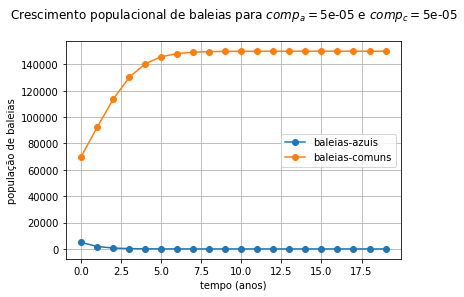

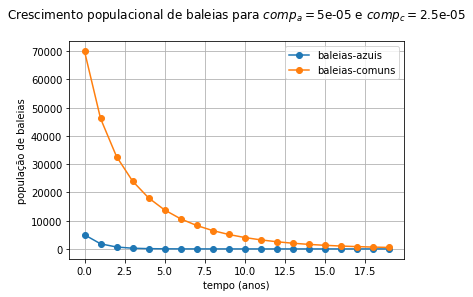

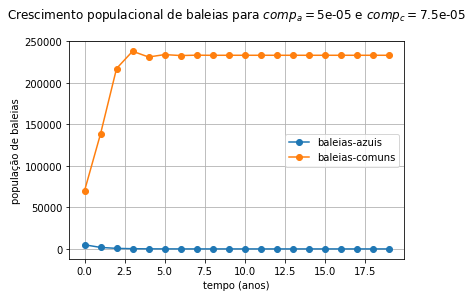

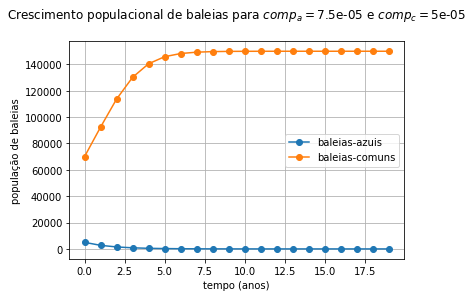

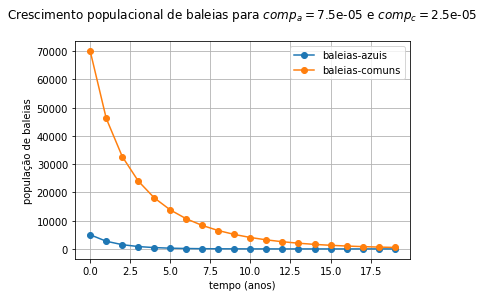

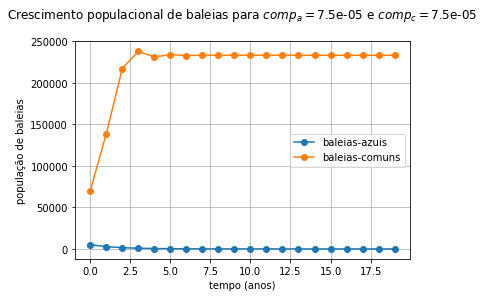

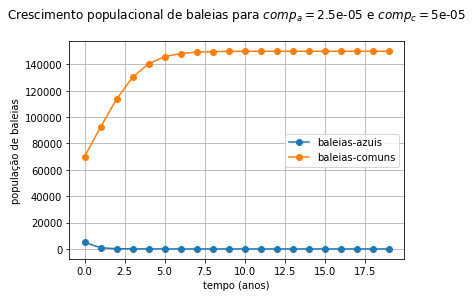

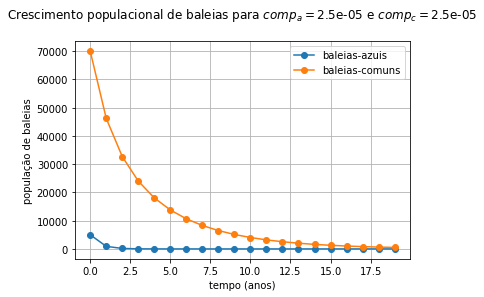

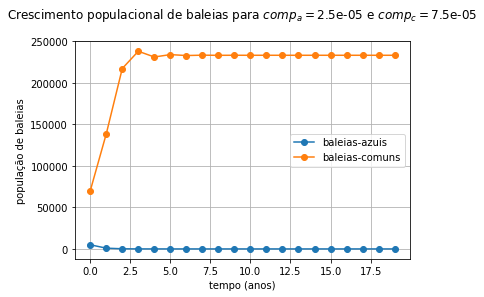

In [ ]:
for comp_a in list_comp_a:
  for comp_c in list_comp_c:
    aux = progressao(k_a, k_c, a_lim, c_lim, n, a_0, c_0, comp_a, comp_c)
    pl.plot(aux[0], '-o', label="baleias-azuis")
    pl.plot(aux[1], '-o', label="baleias-comuns")
    pl.title('Crescimento populacional de baleias para $comp_{a} = $'+str(comp_a)+' e $comp_{c} = $'+str(comp_c)+'\n')
    pl.xlabel('tempo (anos)')
    pl.ylabel('população de baleias')
    pl.legend()
    pl.grid()
    pl.show()
    print('\n')

Como é possível perceber através dos gráficos, a baleia-azul será extinta, independentemente da taxa de competição, que teve diversos valores assumidos.

---
